In [1]:
!pip install cmake
!pip install opencv-python
!conda install -y dlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - dlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    certifi-2026.1.4           |     pyhd8ed1ab_0         147 KB  conda-forge
    dlib-20.0.0                |cpu_py312hb8e531a_0         3.3 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  dlib  

In [2]:
# ============================================
# 1. 매직 커맨드와 임포트 (첫 번째 셀)
# ============================================
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
import dlib
import os
import numpy as np


In [3]:
# ============================================
# 2. 모델 다운로드 (두 번째 셀)
# ============================================
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mkdir -p ~/work/camera_sticker/models
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/camera_sticker/models/
!bzip2 -d ~/work/camera_sticker/models/shape_predictor_68_face_landmarks.dat.bz2


--2026-01-16 05:58:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-01-16 05:58:14--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.8MB/s    in 4.2s    

2026-01-16 05:58:19 (14.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file /home/jovyan/work/camera_sticker/models/shape_predictor_68_face_landmarks.dat already exists.


In [4]:
# ============================================
# 3. 이미지 파일명 설정 (세 번째 셀) - ⭐ 변경된 부분
# ============================================
# 이미지 경로 설정
home_dir = os.path.expanduser('~')
img_path = os.path.join(home_dir, 'work/camera_sticker/images/selfie.png')  # ⭐ 변경
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat.png')  # ⭐ 변경

# 파일 존재 확인
if not os.path.exists(img_path):
    print(f"❌ 얼굴 이미지를 찾을 수 없습니다: {img_path}")
    print("👉 Jupyter 인터페이스에서 selfie.png를 업로드하세요!")
else:
    print(f"✅ 얼굴 이미지 발견: {img_path}")

if not os.path.exists(sticker_path):
    print(f"❌ 스티커 이미지를 찾을 수 없습니다: {sticker_path}")
    print("👉 Jupyter 인터페이스에서 cat.png를 업로드하세요!")
else:
    print(f"✅ 스티커 이미지 발견: {sticker_path}")

✅ 얼굴 이미지 발견: /home/jovyan/work/camera_sticker/images/selfie.png
✅ 스티커 이미지 발견: /home/jovyan/work/camera_sticker/images/cat.png


In [5]:
# ============================================
# 4. 이미지 로드 (네 번째 셀) - ⭐ 변경된 부분
# ============================================
# 얼굴 이미지 로드
img_bgr = cv2.imread(img_path)  # ⭐ selfie.png 읽기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()

# 스티커 이미지 로드
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # ⭐ cat.png 읽기

print(f"얼굴 이미지 크기: {img_rgb.shape}")
print(f"스티커 이미지 크기: {sticker_img.shape}")

얼굴 이미지 크기: (960, 1440, 3)
스티커 이미지 크기: (512, 512, 4)


In [6]:
# ============================================
# 5. 얼굴 탐지 및 랜드마크 예측 (다섯 번째 셀)
# ============================================
# 모델 로드
home_dir = os.path.expanduser('~')
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
landmark_predictor = dlib.shape_predictor(model_path)
detector = dlib.get_frontal_face_detector()

print("🌫🛸 모델 로딩 완료!")

🌫🛸 모델 로딩 완료!


In [7]:
# 얼굴 탐지
dlib_rects = detector(img_rgb, 1)
print(f"탐지된 얼굴 수: {len(dlib_rects)}")

# 랜드마크 추출
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

if len(list_landmarks) > 0:
    print(f"랜드마크 개수: {len(list_landmarks[0])}")
else:
    print("⚠️ 얼굴이 탐지되지 않았습니다!")

탐지된 얼굴 수: 1
랜드마크 개수: 68


Text(0.5, 1.0, 'Face Landmarks Detection')

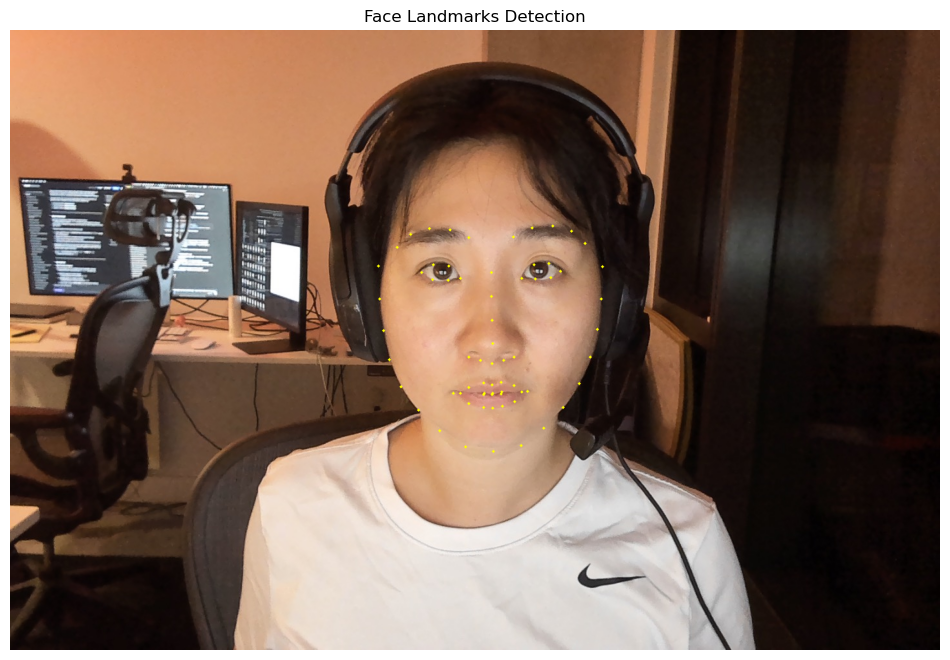

In [8]:
# ============================================
# 6. 랜드마크 시각화 (여섯 번째 셀)
# ============================================
# 랜드마크 그리기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

# 이미지 표시
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 10))
plt.imshow(img_show_rgb)
plt.axis('off')
plt.title('Face Landmarks Detection')

In [9]:
# ============================================
# 7. 스티커 합성 (일곱 번째 셀) - ⭐ cat.png를 얼굴에 합성
# ============================================
def overlay_transparent(background, overlay, x, y):
    """
    투명 배경 이미지를 합성하는 함수
    """
    bg_h, bg_w = background.shape[:2]
    ov_h, ov_w = overlay.shape[:2]
    
    # 범위 체크
    if x >= bg_w or y >= bg_h or x + ov_w <= 0 or y + ov_h <= 0:
        return background
    
    # 오버레이 영역 계산
    x1, y1 = max(x, 0), max(y, 0)
    x2, y2 = min(x + ov_w, bg_w), min(y + ov_h, bg_h)
    
    overlay_x1 = x1 - x
    overlay_y1 = y1 - y
    overlay_x2 = overlay_x1 + (x2 - x1)
    overlay_y2 = overlay_y1 + (y2 - y1)
    
    # 알파 채널이 있는 경우
    if overlay.shape[2] == 4:
        overlay_cropped = overlay[overlay_y1:overlay_y2, overlay_x1:overlay_x2]
        alpha = overlay_cropped[:, :, 3] / 255.0
        alpha = np.expand_dims(alpha, axis=2)
        
        background[y1:y2, x1:x2] = (
            alpha * overlay_cropped[:, :, :3] + 
            (1 - alpha) * background[y1:y2, x1:x2]
        ).astype(np.uint8)
    else:
        background[y1:y2, x1:x2] = overlay[overlay_y1:overlay_y2, overlay_x1:overlay_x2]
    
    return background


✅ 결과 이미지 저장: result_with_cat.png


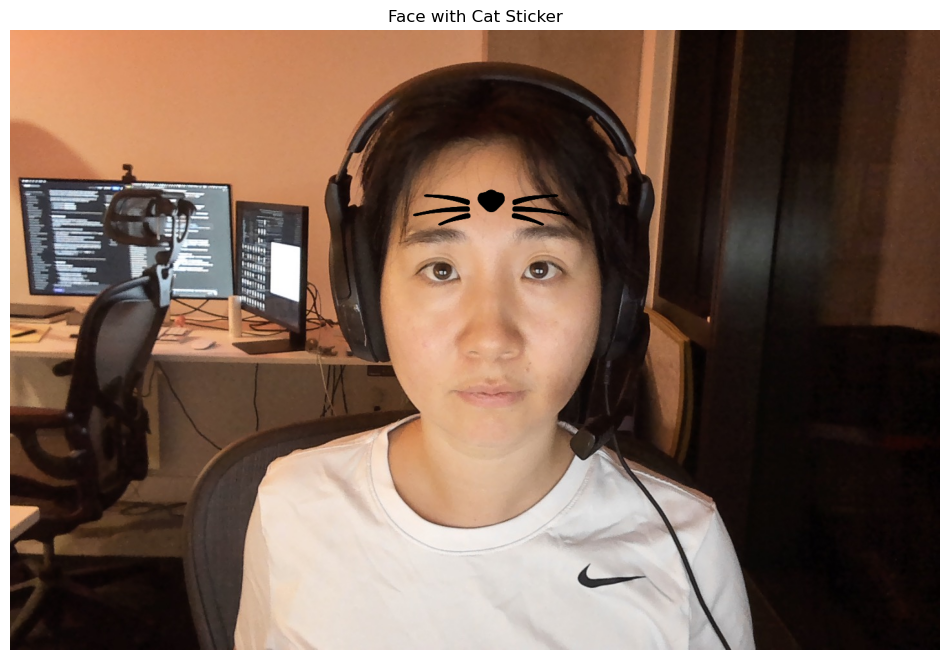

✅ 결과 이미지 저장: result_with_cat.png


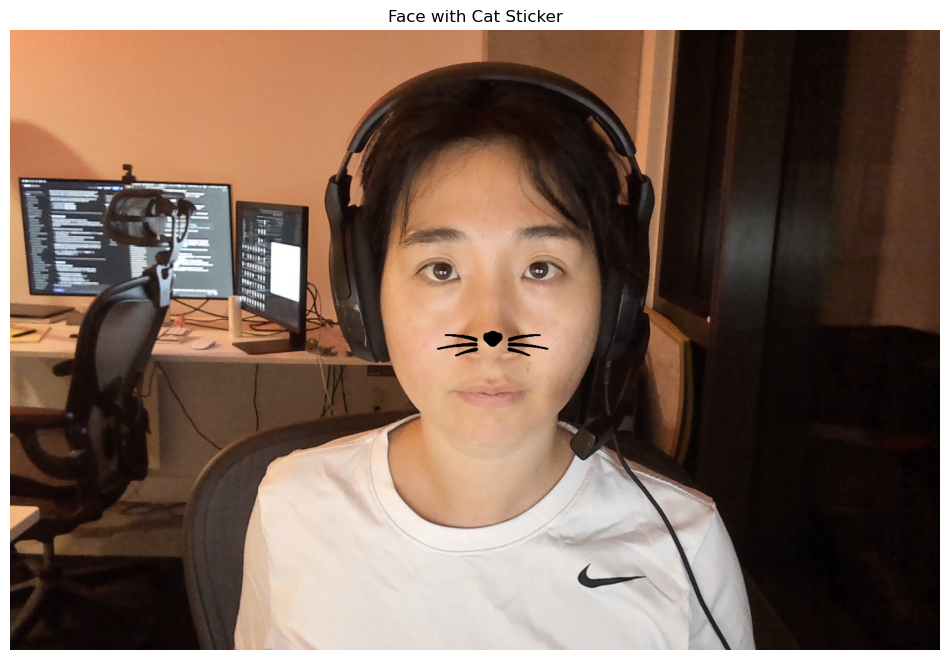

In [11]:
# ============================================
# 7. 스티커 합성 (일곱 번째 셀) - ⭐ cat.png를 얼굴에 합성
# ============================================
def overlay_transparent(background, overlay, x, y):
    """
    투명 배경 이미지를 합성하는 함수
    """
    bg_h, bg_w = background.shape[:2]
    ov_h, ov_w = overlay.shape[:2]
    
    # 범위 체크
    if x >= bg_w or y >= bg_h or x + ov_w <= 0 or y + ov_h <= 0:
        return background
    
    # 오버레이 영역 계산
    x1, y1 = max(x, 0), max(y, 0)
    x2, y2 = min(x + ov_w, bg_w), min(y + ov_h, bg_h)
    
    overlay_x1 = x1 - x
    overlay_y1 = y1 - y
    overlay_x2 = overlay_x1 + (x2 - x1)
    overlay_y2 = overlay_y1 + (y2 - y1)
    
    # 알파 채널이 있는 경우
    if overlay.shape[2] == 4:
        overlay_cropped = overlay[overlay_y1:overlay_y2, overlay_x1:overlay_x2]
        alpha = overlay_cropped[:, :, 3] / 255.0
        alpha = np.expand_dims(alpha, axis=2)
        
        background[y1:y2, x1:x2] = (
            alpha * overlay_cropped[:, :, :3] + 
            (1 - alpha) * background[y1:y2, x1:x2]
        ).astype(np.uint8)
    else:
        background[y1:y2, x1:x2] = overlay[overlay_y1:overlay_y2, overlay_x1:overlay_x2]
    
    return background

# 스티커 합성 (첫 번째 얼굴에만 적용)
if len(list_landmarks) > 0:
    img_result = img_bgr.copy()
    
    # 코 중앙 위치 계산 (랜드마크 30번: 코끝)
    landmark = list_landmarks[0]
    nose_x = landmark[30][0]  # 코끝 x 좌표
    nose_y = landmark[30][1]  # 코끝 y 좌표
    
    # 스티커 크기 조정 (얼굴 너비의 50% 정도로 작게)
    face_width = abs(landmark[16][0] - landmark[0][0])
    sticker_width = int(face_width * 0.5)  # 0.5로 줄임
    sticker_height = int(sticker_img.shape[0] * (sticker_width / sticker_img.shape[1]))
    
    resized_sticker = cv2.resize(sticker_img, (sticker_width, sticker_height))
    
    # 스티커 위치 (코 중앙에 맞춤)
    sticker_x = nose_x - sticker_width // 2
    sticker_y = nose_y - sticker_height // 2
    
    # 스티커 합성
    img_result = overlay_transparent(img_result, resized_sticker, sticker_x, sticker_y)
    
    # 결과 표시
    img_result_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(img_result_rgb)
    plt.axis('off')
    plt.title('Face with Cat Sticker')
    
    # 결과 저장 (선택사항)
    result_path = 'result_with_cat.png'
    cv2.imwrite(result_path, img_result)
    print(f"✅ 결과 이미지 저장: {result_path}")
else:
    print("⚠️ 얼굴이 탐지되지 않아 스티커를 합성할 수 없습니다.")

In [12]:
ls

'Camera Sticker.ipynb'   shape_predictor_68_face_landmarks.dat.bz2.1
 images/                 shape_predictor_68_face_landmarks.dat.bz2.2
 models/                 shape_predictor_68_face_landmarks.dat.bz2.3
 result_with_cat.png


In [13]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)